In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Load the datasets

In [ ]:
# Define the path to the dataset
data_path = "/content/drive/MyDrive/data"
heart_path = os.path.join(data_path, "heart")
closed_path = os.path.join(heart_path, "closed")
open_path = os.path.join(heart_path, "open")
various_path = os.path.join(heart_path, "various")
non_heart_path = os.path.join(data_path, "non-heart")


# pre-process images

In [ ]:
# Function to load and preprocess images
def load_and_preprocess_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize the image to 224x224
            img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
            images.append(img)
            labels.append(os.path.basename(folder))
    return images, labels


In [ ]:
# Load and preprocess images from the heart folders
closed_images, closed_labels = load_and_preprocess_images(closed_path)
open_images, open_labels = load_and_preprocess_images(open_path)
various_images, various_labels = load_and_preprocess_images(various_path)

In [ ]:
# Combine heart images and labels
images = closed_images + open_images + various_images
labels = closed_labels + open_labels + various_labels


In [ ]:
# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
# Encode labels
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(f"Number of unique labels: {len(set(labels))}")
print(f"Number of data points: {len(labels)}")

Number of unique labels: 3
Number of data points: 219


In [ ]:
# Split the dataset into training and testing sets without stratification
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
# Train non-neural network classifier (SVM)
svm_model = SVC()
svm_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Train non-neural network classifier (Random Forest)
rf_model = RandomForestClassifier()
rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Train neural network classifier
input_shape = (224, 224, 3)  # Assuming images are color images
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
6/6 [==============================] - 1s 35ms/step - loss: 4.3087 - accuracy: 0.5086
Epoch 2/10
6/6 [==============================] - 0s 32ms/step - loss: 0.9113 - accuracy: 0.6971
Epoch 3/10
6/6 [==============================] - 0s 31ms/step - loss: 0.3077 - accuracy: 0.8571
Epoch 4/10
6/6 [==============================] - 0s 31ms/step - loss: 0.1664 - accuracy: 0.9371
Epoch 5/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0963 - accuracy: 0.9600
Epoch 6/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0715 - accuracy: 0.9600
Epoch 7/10
6/6 [==============================] - 0s 32ms/step - loss: 0.1022 - accuracy: 0.9257
Epoch 8/10
6/6 [==============================] - 0s 31ms/step - loss: 0.0851 - accuracy: 0.9371
Epoch 9/10
6/6 [==============================] - 0s 31ms/step - loss: 0.0477 - accuracy: 0.9657
Epoch 10/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0045 - accuracy: 0.9714


In [ ]:
# Evaluate models
svm_predictions = svm_model.predict(X_test.reshape(X_test.shape[0], -1))
rf_predictions = rf_model.predict(X_test.reshape(X_test.shape[0], -1))
# Predict probabilities for each class
nn_probabilities = model.predict(X_test)

# Convert probabilities to class labels
nn_predictions = np.argmax(nn_probabilities, axis=1)


2/2 [==============================] - 0s 9ms/step


# SVM Classification

In [ ]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.97      0.98        32

    accuracy                           0.98        44
   macro avg       0.96      0.98      0.97        44
weighted avg       0.98      0.98      0.98        44



# Random Forest Classification

In [ ]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.97      0.98        32

    accuracy                           0.98        44
   macro avg       0.96      0.98      0.97        44
weighted avg       0.98      0.98      0.98        44



# Neural Network Classification

In [ ]:
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.27      1.00      0.43        12
           1       0.00      0.00      0.00        32

    accuracy                           0.27        44
   macro avg       0.14      0.50      0.21        44
weighted avg       0.07      0.27      0.12        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# point - 1

In [ ]:
from sklearn.model_selection import StratifiedKFold
from keras.preprocessing.image import ImageDataGenerator

# data augmentation

In [ ]:
# Initialize ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


# 5-fold cross-validation

In [ ]:
# Perform 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(images, labels):
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Apply data augmentation
    train_generator = datagen.flow(X_train, y_train, batch_size=32)

    # Train the model
    model.fit(train_generator, epochs=10)

    # Evaluate the model
    scores = model.evaluate(X_test, y_test)
    print(f"Test loss: {scores[0]}, Test accuracy: {scores[1]}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Epoch 1/10
6/6 [==============================] - 2s 299ms/step - loss: 1.2589 - accuracy: 0.5143
Epoch 2/10
6/6 [==============================] - 3s 550ms/step - loss: 0.7166 - accuracy: 0.6457
Epoch 3/10
6/6 [==============================] - 2s 302ms/step - loss: 0.6622 - accuracy: 0.6400
Epoch 4/10
6/6 [==============================] - 2s 292ms/step - loss: 0.6600 - accuracy: 0.6343
Epoch 5/10
6/6 [==============================] - 2s 300ms/step - loss: 0.6498 - accuracy: 0.6286
Epoch 6/10
6/6 [==============================] - 2s 335ms/step - loss: 0.6509 - accuracy: 0.6286
Epoch 7/10
6/6 [==============================] - 3s 598ms/step - loss: 0.6415 - accuracy: 0.6286
Epoch 8/10
6/6 [==============================] - 2s 299ms/step - loss: 0.6587 - accuracy: 0.6286
Epoch 9/10
6/6 [==============================] - 2s 303ms/step - loss: 0.6481 - accuracy: 0.6286
Epoch 10/10
2/2 [==============================] - 0s 12ms/step - loss: 0.3975 - accuracy: 0.9545
Test loss: 0.3974724

# 2.

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
# Function to load and preprocess images
def load_and_preprocess_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize the image to 224x224
            img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
            images.append(img)
            labels.append(os.path.basename(folder))
    return images, labels

In [ ]:
# Define the paths to the heart dataset
data_path = "/content/drive/MyDrive/data"
heart_path = os.path.join(data_path, "heart")
closed_path = os.path.join(heart_path, "closed")
open_path = os.path.join(heart_path, "open")
various_path = os.path.join(heart_path, "various")

In [ ]:
# Load and preprocess images from the heart folders
closed_images, closed_labels = load_and_preprocess_images(closed_path)
open_images, open_labels = load_and_preprocess_images(open_path)
various_images, various_labels = load_and_preprocess_images(various_path)

In [ ]:
# Combine heart images and labels
images = closed_images + open_images + various_images
labels = closed_labels + open_labels + various_labels

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Encode labels
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
# Split the dataset into training and testing sets without stratification
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 [==============================] - 33s 7s/step - loss: 1.1811 - accuracy: 0.5714 - val_loss: 0.7619 - val_accuracy: 0.6571
Epoch 2/10
5/5 [==============================] - 15s 3s/step - loss: 0.4596 - accuracy: 0.7714 - val_loss: 0.5762 - val_accuracy: 0.8857
Epoch 3/10
5/5 [==============================] - 15s 3s/step - loss: 0.2747 - accuracy: 0.9143 - val_loss: 0.7098 - val_accuracy: 0.8571
Epoch 4/10
5/5 [==============================] - 15s 3s/step - loss: 0.1387 - accuracy: 0.9500 - val_loss: 0.8884 - val_accuracy: 0.8857
Epoch 5/10
5/5 [==============================] - 15s 3s/step - loss: 0.0969 - accuracy: 0.9643 - val_loss: 0.9952 - val_accuracy: 0.9143
Epoch 6/10
5/5 [==============================] - 15s 3s/step - loss: 0.0656 - accuracy: 0.9857 - val_loss: 1.1764 - val_accuracy: 0.8857
Epoch 7/10
5/5 [==============================] - 14s 3s/step - loss: 0.0470 - accuracy: 0.9857 - val_loss: 1.2218 - val_accuracy: 0.9143
Epoch 8/10
5/5 [==================

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

2/2 [==============================] - 1s 273ms/step


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.91      0.95        32

    accuracy                           0.93        44
   macro avg       0.90      0.95      0.92        44
weighted avg       0.95      0.93      0.93        44



In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))


Confusion Matrix:
[[12  0]
 [ 5 27]]


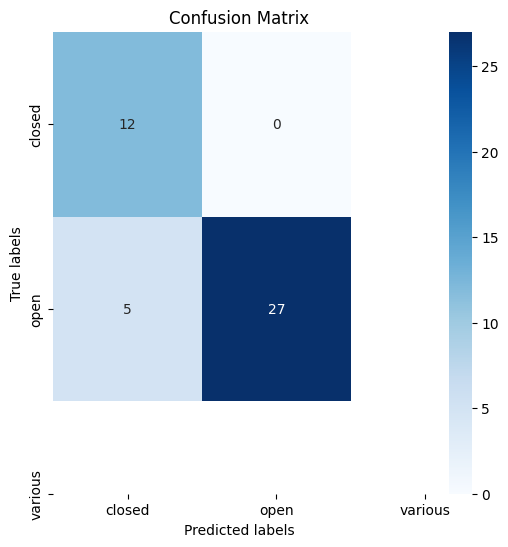

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['closed', 'open', 'various'],
            yticklabels=['closed', 'open', 'various'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# 3.

# VGG16 model for transfer learning

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Define the paths to the heart dataset
data_path = "/content/drive/MyDrive/data"
heart_path = os.path.join(data_path, "heart")
closed_path = os.path.join(heart_path, "closed")
open_path = os.path.join(heart_path, "open")
various_path = os.path.join(heart_path, "various")

# Function to load and preprocess images
def load_and_preprocess_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (224, 224))
            img = img.astype('float32') / 255.0
            images.append(img)
            labels.append(os.path.basename(folder))
    return images, labels


In [ ]:
# Load and preprocess images from the heart folders
closed_images, closed_labels = load_and_preprocess_images(closed_path)
open_images, open_labels = load_and_preprocess_images(open_path)
various_images, various_labels = load_and_preprocess_images(various_path)

# Combine heart images and labels
images = closed_images + open_images + various_images
labels = closed_labels + open_labels + various_labels

In [ ]:
# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Encode labels
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')


In [ ]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add custom top layers for classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

# Create the new model
model_transfer_learning = Model(inputs=base_model.input, outputs=output)

# Compile the model
model_transfer_learning.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model_transfer_learning.fit(datagen.flow(X_train, y_train, batch_size=32),
                             epochs=10,
                             validation_data=(X_test, y_test))

Epoch 1/10
6/6 [==============================] - 181s 26s/step - loss: 4.0325 - accuracy: 0.4629 - val_loss: 1.5694 - val_accuracy: 0.2727
Epoch 2/10
6/6 [==============================] - 153s 26s/step - loss: 1.1924 - accuracy: 0.5714 - val_loss: 0.4242 - val_accuracy: 0.9545
Epoch 3/10
6/6 [==============================] - 149s 26s/step - loss: 0.8471 - accuracy: 0.5600 - val_loss: 0.3732 - val_accuracy: 0.8182
Epoch 4/10
6/6 [==============================] - 149s 26s/step - loss: 0.7986 - accuracy: 0.6571 - val_loss: 0.6965 - val_accuracy: 0.3864
Epoch 5/10
6/6 [==============================] - 149s 26s/step - loss: 0.7427 - accuracy: 0.7200 - val_loss: 0.2612 - val_accuracy: 0.9318
Epoch 6/10
6/6 [==============================] - 150s 26s/step - loss: 0.6744 - accuracy: 0.6971 - val_loss: 0.5266 - val_accuracy: 0.7500
Epoch 7/10
6/6 [==============================] - 149s 26s/step - loss: 0.6237 - accuracy: 0.8057 - val_loss: 0.2153 - val_accuracy: 0.9545
Epoch 8/10
6/6 [====

In [ ]:
# Evaluate the model on the test set
y_pred_transfer_learning = model_transfer_learning.predict(X_test)
y_pred_classes_transfer_learning = np.argmax(y_pred_transfer_learning, axis=1)

2/2 [==============================] - 27s 8s/step


In [ ]:
print("\nClassification Report with Transfer Learning (VGG16):")
print(classification_report(y_test, y_pred_classes_transfer_learning))


Classification Report with Transfer Learning (VGG16):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.91      0.95        32

    accuracy                           0.93        44
   macro avg       0.90      0.95      0.92        44
weighted avg       0.95      0.93      0.93        44



In [ ]:
print("\nConfusion Matrix with Transfer Learning (VGG16):")
print(confusion_matrix(y_test, y_pred_classes_transfer_learning))



Confusion Matrix with Transfer Learning (VGG16):
[[12  0]
 [ 3 29]]
